# Chapter: Decision Trees and Ensemble Learning for Fault Detection


# Topic: Fault classification via Random Forests for gas boilers

In [1]:
# packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

plt.rcParams.update({'font.size': 12})

['ExcessAir' 'Fouling' 'Nominal' 'Scaling']


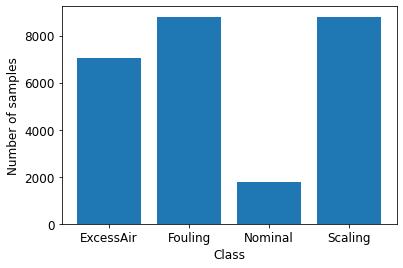

In [2]:
# read data
data = pd.read_csv('Boiler_emulator_dataset.txt', delimiter=',')

data.drop(data[data.Class == 'Lean'].index, inplace=True) # remove rows where Class is Lean
input_data = data.iloc[:,[0,1,3,4]].values # dropping column Treturn
output_label_text = data.iloc[:,-1]

# convert text labels to numeric labels
le = LabelEncoder()
le.fit(output_label_text)
print(le.classes_)

output_labels = le.transform(output_label_text)

#check number of samples for each class
unique_labels, counts = np.unique(output_labels, return_counts=True)

plt.figure()
plt.bar(unique_labels, counts)
plt.xlabel('Class'), plt.ylabel('Number of samples')
plt.xticks(range(4) ,labels=le.classes_)
plt.show()

In [3]:
# separate training and test data
X_train, X_test, y_train, y_test = train_test_split(input_data, output_labels, test_size=0.3, stratify=output_labels, random_state=1)

In [4]:
# scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
#  fit random forest model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_scaled, y_train)

y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)

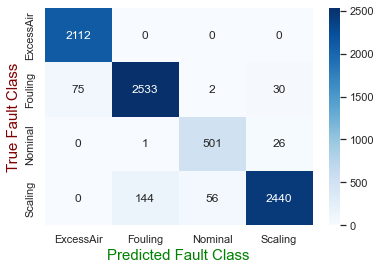

In [10]:
# generate and plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn

conf_mat = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,4))
sn.set(font_scale=1) # for label size
sn.heatmap(conf_mat, fmt='.0f', annot=True, cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('True Fault Class', fontsize=15, color='maroon')
plt.xlabel('Predicted Fault Class', fontsize=15, color='green')
plt.show()